# Superposition in a Privileged Basis

In [47]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import tqdm as tqdm
import torch.nn.utils
import einops
from torch.nn import functional as F


In [48]:
class Model(torch.nn.Module):
    def __init__(self,n_features, n_hidden, S, n_instances=10, 
active=True, hidd_active=True):
        super().__init__()
        self.W = torch.nn.Parameter(torch.empty((n_instances, n_features, 
n_hidden)))
        torch.nn.init.xavier_normal_(self.W)
        self.b_final = torch.nn.Parameter(torch.zeros((n_instances, 
n_features)))
        self.active = active
        
        self.feature_probability = S
        self.n_instances = n_instances
        self.n_features = n_features
        self.hidd_active = hidd_active
        
    def forward(self, features):

        hidden = torch.einsum("...if,ifh->...ih", features, self.W)
        
        if self.hidd_active:
            hidden = F.relu(hidden)

        out = torch.einsum("...ih,ifh->...if", hidden, self.W)

        out = out + self.b_final
        if self.active:
            out = F.relu(out)
        return out
    
    def generate_batch(self, n_batch):
        feat = torch.rand((n_batch, self.n_instances, self.n_features))
        batch = torch.where(
            torch.rand((n_batch, self.n_instances, self.n_features)) <= 
self.feature_probability,
            feat,
            torch.zeros(()),
        )
        return batch


In [49]:
def learning(model, x, importances, n, epoch=10000, lr=0.001, 
batch_size=1024
             ):
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr)


    for epoch in tqdm.tqdm(range(epoch)):

    

        optimizer.zero_grad()

        batch = model.generate_batch(batch_size)

        
        out = model(batch)
        
        error = (importances*(batch.abs() - out)**2)
        loss = einops.reduce(error, 'b i f -> i', 'mean').sum()
        
        loss.backward() 

        optimizer.step()
    return model

        


### n = 5, m = 5

In [84]:
n = 8
m = 5

num = 10000

n_instances = 1
S =  (20 ** -torch.linspace(0, 1, n_instances))[:, None]


n_instances = len(S)

X = np.random.rand(num, n)
importances = torch.tensor([1 for k in range(n)])

In [92]:
model = Model(n, m, S,  n_instances)
model_ =  learning(model, X, importances, n, 1000000)

100%|███████████████████████████████| 1000000/1000000 [06:30<00:00, 2562.48it/s]


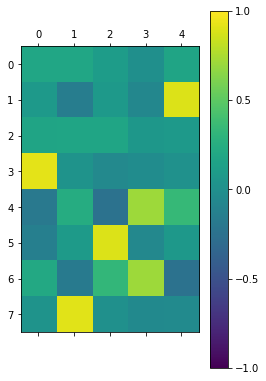

In [93]:
plt.matshow(model_.W.detach().numpy()[0])
plt.colorbar(ticks=[-1, -0.5, 0, 0.5, 1])
plt.clim(-1,1)

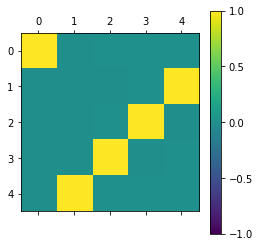

In [56]:
plt.matshow(model_.W.detach().numpy()[0])
plt.colorbar(ticks=[-1, -0.5, 0, 0.5, 1])
plt.clim(-1,1)
plt.savefig("RELU55.pdf", format="pdf", bbox_inches="tight")
plt.show()

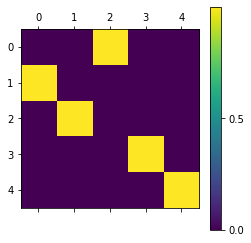

In [35]:
plt.matshow(model_.W.detach().numpy()[0])
plt.colorbar()

In [82]:
model = Model(n, m, S,  n_instances, \
         hidd_active=False)
model_no_ac =  learning(model, X, importances, n, 100000)

100%|█████████████████████████████████| 100000/100000 [00:36<00:00, 2775.91it/s]


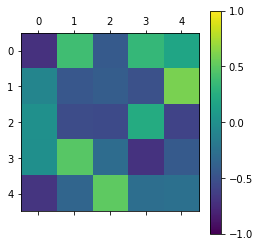

In [83]:
plt.matshow(model_no_ac.W.detach().numpy()[0])
plt.colorbar(ticks=[-1, -0.5, 0, 0.5, 1])
plt.clim(-1,1)
plt.savefig("noRELU55.pdf", format="pdf", bbox_inches="tight")
plt.show()

### n = 6, m = 5

In [59]:
n = 6
m = 5

num = 10000

n_instances = 1
S =  (20 ** -torch.linspace(0, 1, n_instances))[:, None]


n_instances = len(S)

X = np.random.rand(num, n)
importances = torch.tensor([1 for k in range(n)])

In [60]:
model = Model(n, m, S,  n_instances)
model_ =  learning(model, X, importances, n, 100000)

100%|█████████████████████████████████| 100000/100000 [00:37<00:00, 2656.45it/s]


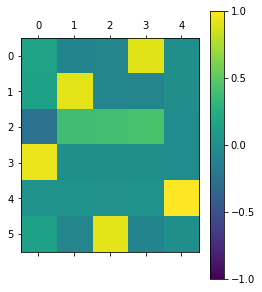

In [61]:
plt.matshow(model_.W.detach().numpy()[0])
plt.colorbar(ticks=[-1, -0.5, 0, 0.5, 1])
plt.clim(-1,1)
plt.savefig("RELU65.pdf", format="pdf")
plt.show()

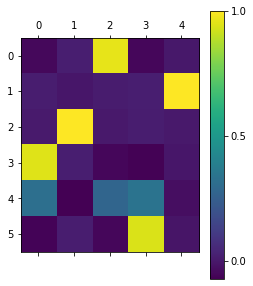

In [58]:
plt.matshow(model_.W.detach().numpy()[0])
plt.colorbar(ticks=[-1, -0.5, 0, 0.5, 1])

In [62]:
model = Model(n, m, S,  n_instances, \
         hidd_active=False)
model_no_ac =  learning(model, X, importances, n, 100000)

100%|█████████████████████████████████| 100000/100000 [00:36<00:00, 2709.93it/s]


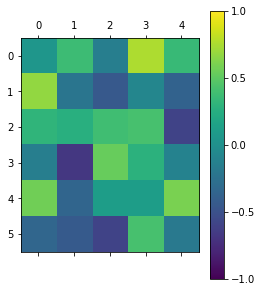

In [63]:
plt.matshow(model_no_ac.W.detach().numpy()[0])
plt.colorbar(ticks=[-1, -0.5, 0, 0.5, 1])
plt.clim(-1,1)
plt.savefig("noRELU65.pdf", format="pdf")
plt.show()

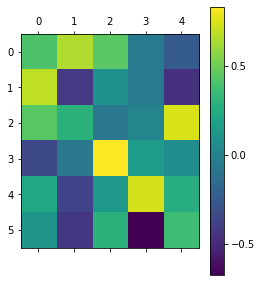

In [42]:
plt.matshow(model_no_ac.W.detach().numpy()[0])
plt.colorbar(ticks=[-1, -0.5, 0, 0.5, 1])

### n = 8, m = 5

In [76]:
n = 8
m = 5

num = 10000

n_instances = 1
S =  (20 ** -torch.linspace(0, 1, n_instances))[:, None]


n_instances = len(S)

X = np.random.rand(num, n)
importances = torch.tensor([1 for k in range(n)])

In [77]:
model = Model(n, m, S,  n_instances)
model_ =  learning(model, X, importances, n, 100000)

100%|█████████████████████████████████| 100000/100000 [00:40<00:00, 2472.26it/s]


In [75]:
model_.W

Parameter containing:
tensor([[[ 5.9198e-01,  4.8045e-01, -2.2433e-01,  2.0438e-01, -2.2850e-01],
         [ 9.7851e-02,  6.8332e-02,  1.9351e-01,  1.1485e-01,  1.5967e-01],
         [-4.9317e-02, -5.0204e-04, -1.6308e-02,  9.2307e-01,  1.3030e-02],
         [ 8.5033e-02,  8.5262e-02,  1.8983e-01,  2.0461e-01,  9.0430e-02],
         [ 7.9165e-01, -2.4135e-01,  2.2104e-01, -1.4646e-01,  2.2135e-01],
         [-7.4686e-02,  3.3596e-02,  9.0430e-01,  6.9944e-02, -8.4395e-02],
         [-5.0221e-02,  2.2258e-04, -1.0031e-01,  7.6083e-02,  9.1788e-01],
         [-1.2142e-01,  8.4635e-01,  1.2080e-01, -1.8809e-01,  1.7515e-01]]],
       requires_grad=True)

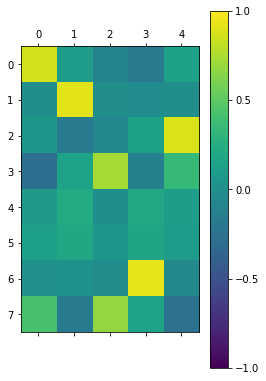

In [78]:
plt.matshow(model_.W.detach().numpy()[0])
plt.colorbar(ticks=[-1, -0.5, 0, 0.5, 1])
plt.clim(-1,1)
plt.savefig("RELU85.pdf", format="pdf")
plt.show()

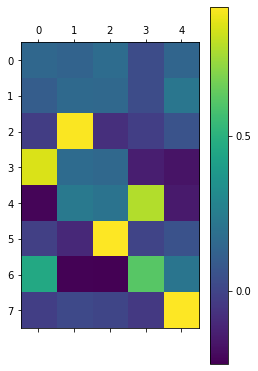

In [37]:
plt.matshow(model_.W.detach().numpy()[0])
plt.colorbar(ticks=[-1, -0.5, 0, 0.5, 1])

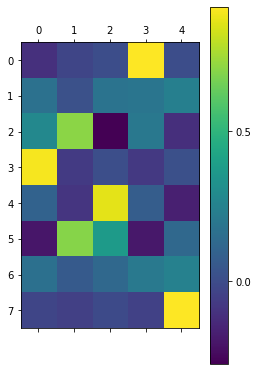

In [65]:
plt.matshow(model_.W.detach().numpy()[0])
plt.colorbar(ticks=[-1, -0.5, 0, 0.5, 1])

In [79]:
model = Model(n, m, S,  n_instances, \
         hidd_active=False)
model_no_ac =  learning(model, X, importances, n, 100000)

100%|█████████████████████████████████| 100000/100000 [00:39<00:00, 2523.82it/s]


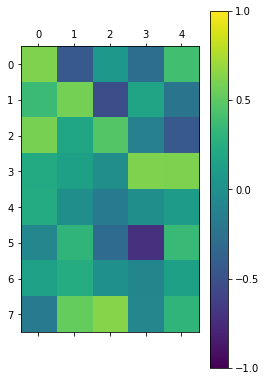

In [80]:
plt.matshow(model_no_ac.W.detach().numpy()[0])
plt.colorbar(ticks=[-1, -0.5, 0, 0.5, 1])
plt.clim(-1,1)
plt.savefig("noRELU85.pdf", format="pdf")
plt.show()

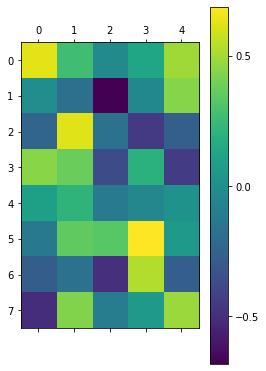

In [46]:
plt.matshow(model_no_ac.W.detach().numpy()[0])
plt.colorbar(ticks=[-1, -0.5, 0, 0.5, 1])


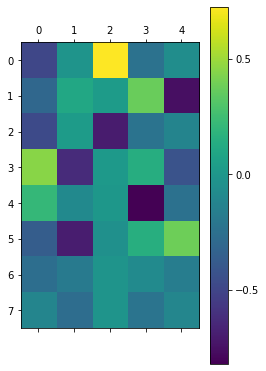

In [67]:
plt.matshow(model_no_ac.W.detach().numpy()[0])
plt.colorbar(ticks=[-1, -0.5, 0, 0.5, 1])



### VISUALIZING SUPERPOSITION IN TERMS OF NEURONS

In [35]:
n = 10
m = 5

num = 10000

n_instances = 10
S =  (30 ** -torch.linspace(0, 1, n_instances))[:, None]


X = np.random.rand(num, n)
importances = torch.tensor([0.75**k for k in range(n)])

In [36]:
importances

tensor([1.0000, 0.7500, 0.5625, 0.4219, 0.3164, 0.2373, 0.1780, 0.1335, 0.1001,
        0.0751])

In [37]:
S

tensor([[1.0000],
        [0.6853],
        [0.4696],
        [0.3218],
        [0.2205],
        [0.1511],
        [0.1036],
        [0.0710],
        [0.0486],
        [0.0333]])

In [38]:
model_ner_term = Model(n, m, S,  n_instances)
model_ner_term_train =  learning(model_ner_term , X, importances, n, 100000)

100%|██████████████████████████████████| 100000/100000 [03:20<00:00, 498.52it/s]


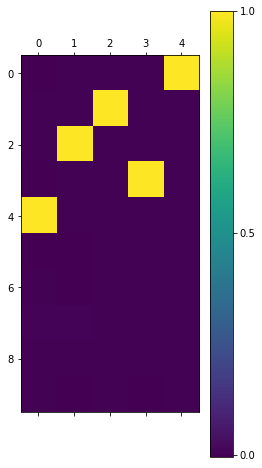

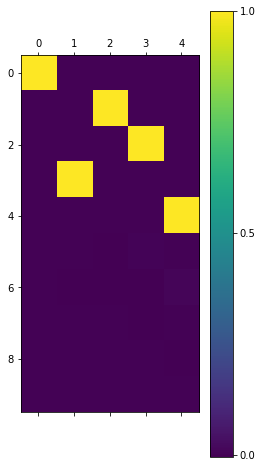

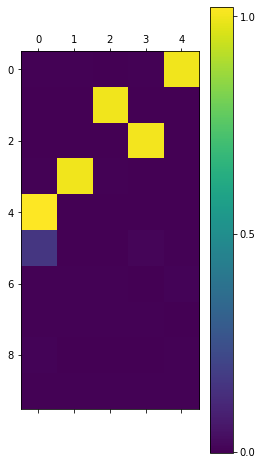

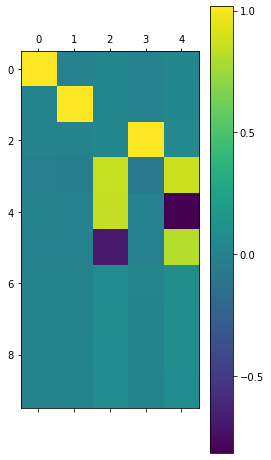

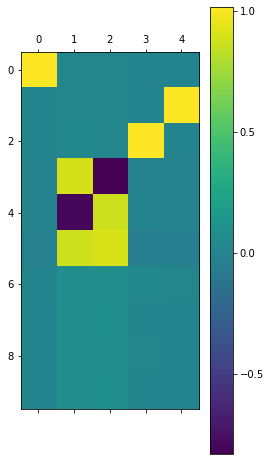

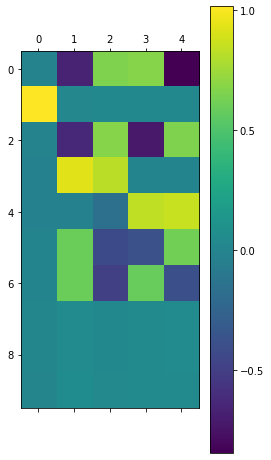

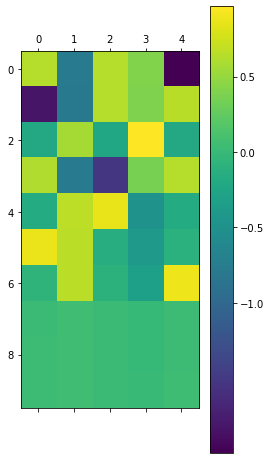

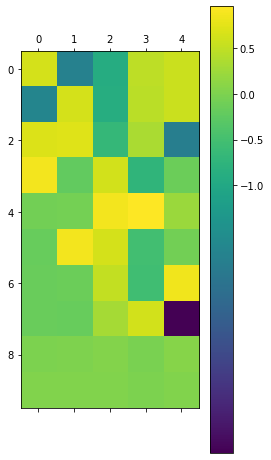

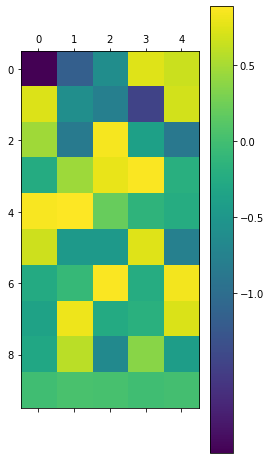

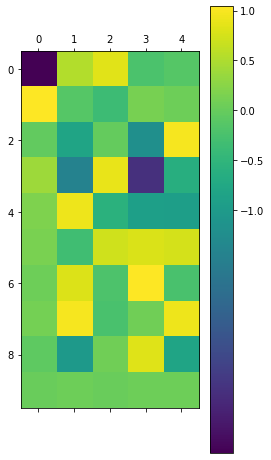

In [40]:
for i in range(n_instances):
    plt.matshow(model_ner_term_train.W.detach().numpy()[i])
    plt.colorbar(ticks=[-1, -0.5, 0, 0.5, 1])